## Extração

In [1]:
import pandas as pd

caminho_arquivo = r'data\TelecomX_Data.json'

dados = pd.read_json(caminho_arquivo)
df_bruto = pd.json_normalize(data=dados.to_dict('records'), sep='_')

print("Dados extraídos e normalizados com sucesso!")
df_bruto.head()

Dados extraídos e normalizados com sucesso!


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Transformação

In [ ]:
# mostrando as informações do DataFrame
print("Informações iniciais do DataFrame:")
df_bruto.info()

# 5 últimas linhas
print("\nÚltimas 5 linhas do DataFrame:")
df_bruto.tail()

Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_Tech

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [ ]:
# Verificando os valores únicos
print("Valores únicos em 'Churn' antes do tratamento:")
print(df_bruto['Churn'].unique())

df_transformado = df_bruto.query("Churn != ''").copy()

print("\nValores únicos em 'Churn' depois do tratamento:")
print(df_transformado['Churn'].unique())

Valores únicos em 'Churn' antes do tratamento:
['No' 'Yes' '']

Valores únicos em 'Churn' depois do tratamento:
['No' 'Yes']


In [ ]:
import numpy as np

# Substituir espaços vazios por NaN (Nulo)
df_transformado['account_Charges_Total'] = df_transformado['account_Charges_Total'].replace(' ', np.nan)

df_transformado.dropna(subset=['account_Charges_Total'], inplace=True)

df_transformado['account_Charges_Total'] = df_transformado['account_Charges_Total'].astype(float)

# Verificando o tipo da coluna
print("\nTipo da coluna 'account_Charges_Total' após a conversão:")
print(df_transformado['account_Charges_Total'].dtype)


Tipo da coluna 'account_Charges_Total' após a conversão:
float64


In [5]:
print("\nInformações do DataFrame após a transformação:")
df_transformado.info()


Informações do DataFrame após a transformação:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  inter

## Carga e análise

C:\Users\Rafael\AppData\Local\Temp\ipykernel_1968\3760741171.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


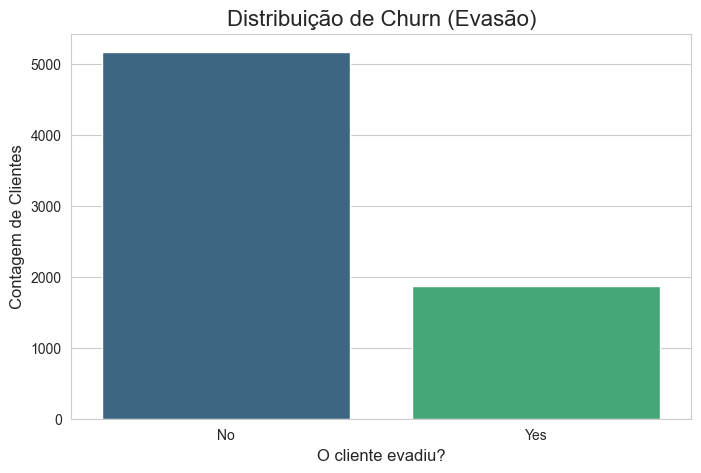

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

# gráfico de contagem
sns.countplot(
    x='Churn',
    data=df_transformado,
    ax=ax,
    palette='viridis'
)

# adicionando título e rótulos
ax.set_title('Distribuição de Churn (Evasão)', fontsize=16)
ax.set_xlabel('O cliente evadiu?', fontsize=12)
ax.set_ylabel('Contagem de Clientes', fontsize=12)

plt.show()

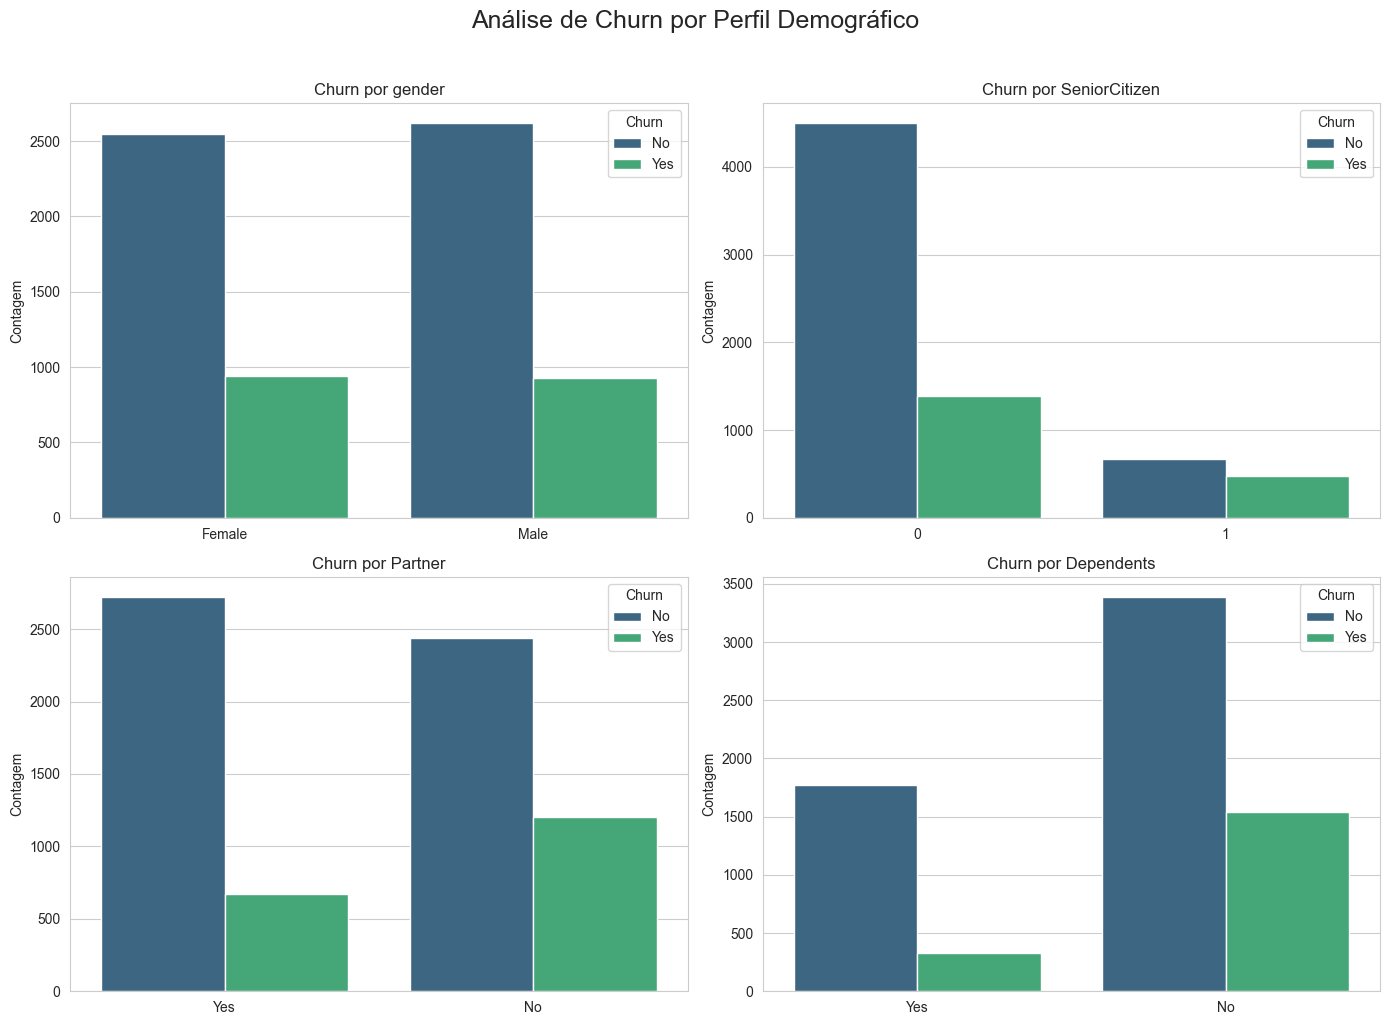

In [ ]:
# lista das colunas demográficas para análise
colunas_demograficas = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Título
fig.suptitle('Análise de Churn por Perfil Demográfico', fontsize=18, y=1.02)

for i, col in enumerate(colunas_demograficas):
    ax = axes.flat[i] 
    sns.countplot(
        x=col,
        hue='Churn', 
        data=df_transformado,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(f'Churn por {col.split("_")[1]}') 
    ax.set_xlabel('') 
    ax.set_ylabel('Contagem')

plt.tight_layout()
plt.show()

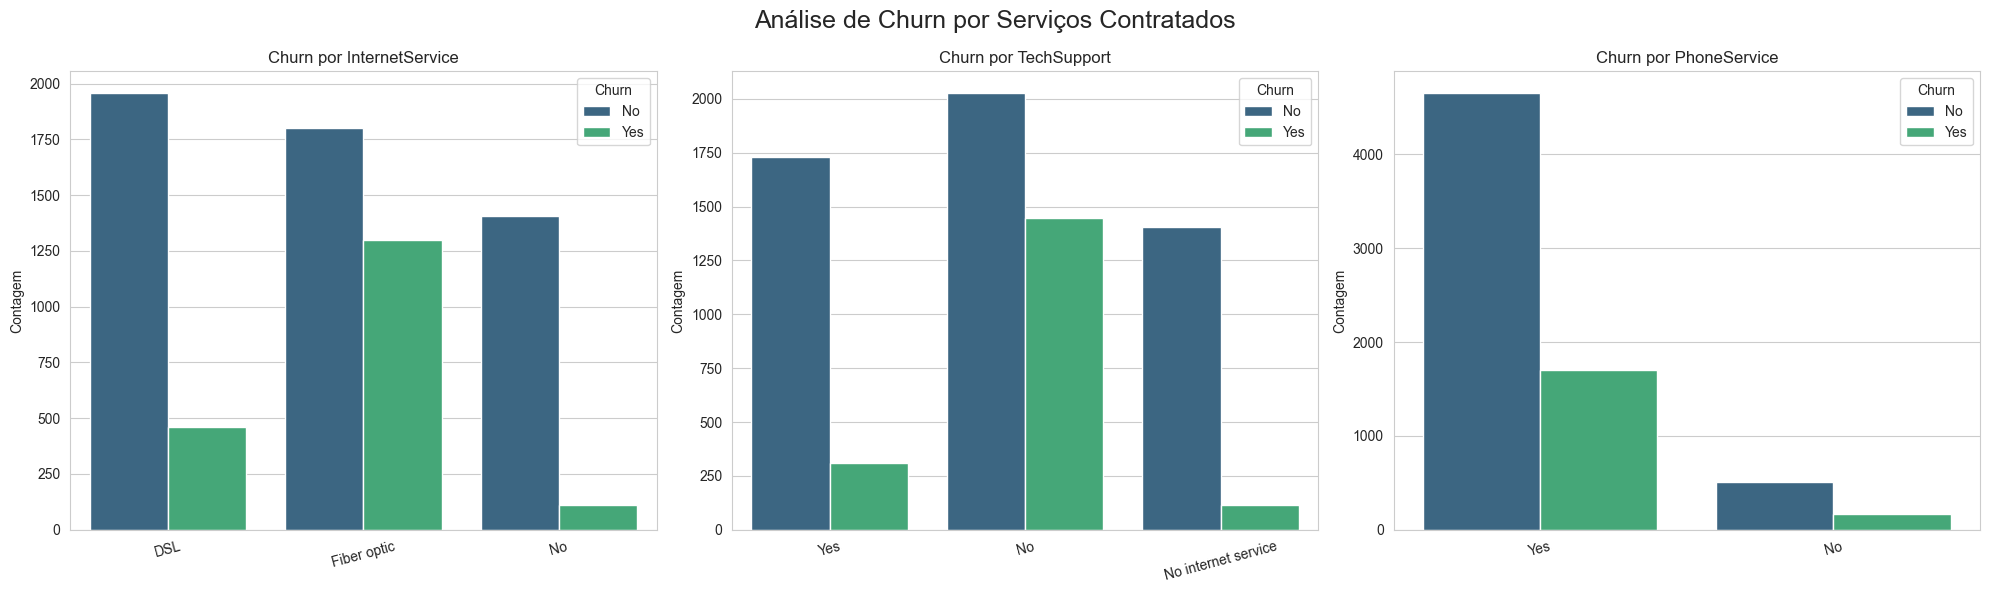

In [ ]:
# Lista das colunas de serviços
colunas_servicos = ['internet_InternetService', 'internet_TechSupport', 'phone_PhoneService']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Título 
fig.suptitle('Análise de Churn por Serviços Contratados', fontsize=18)

for i, col in enumerate(colunas_servicos):
    ax = axes[i]
    sns.countplot(
        x=col,
        hue='Churn',
        data=df_transformado,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(f'Churn por {col.split("_")[1]}')
    ax.set_xlabel('')
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', labelrotation=15)


plt.tight_layout()
plt.show()

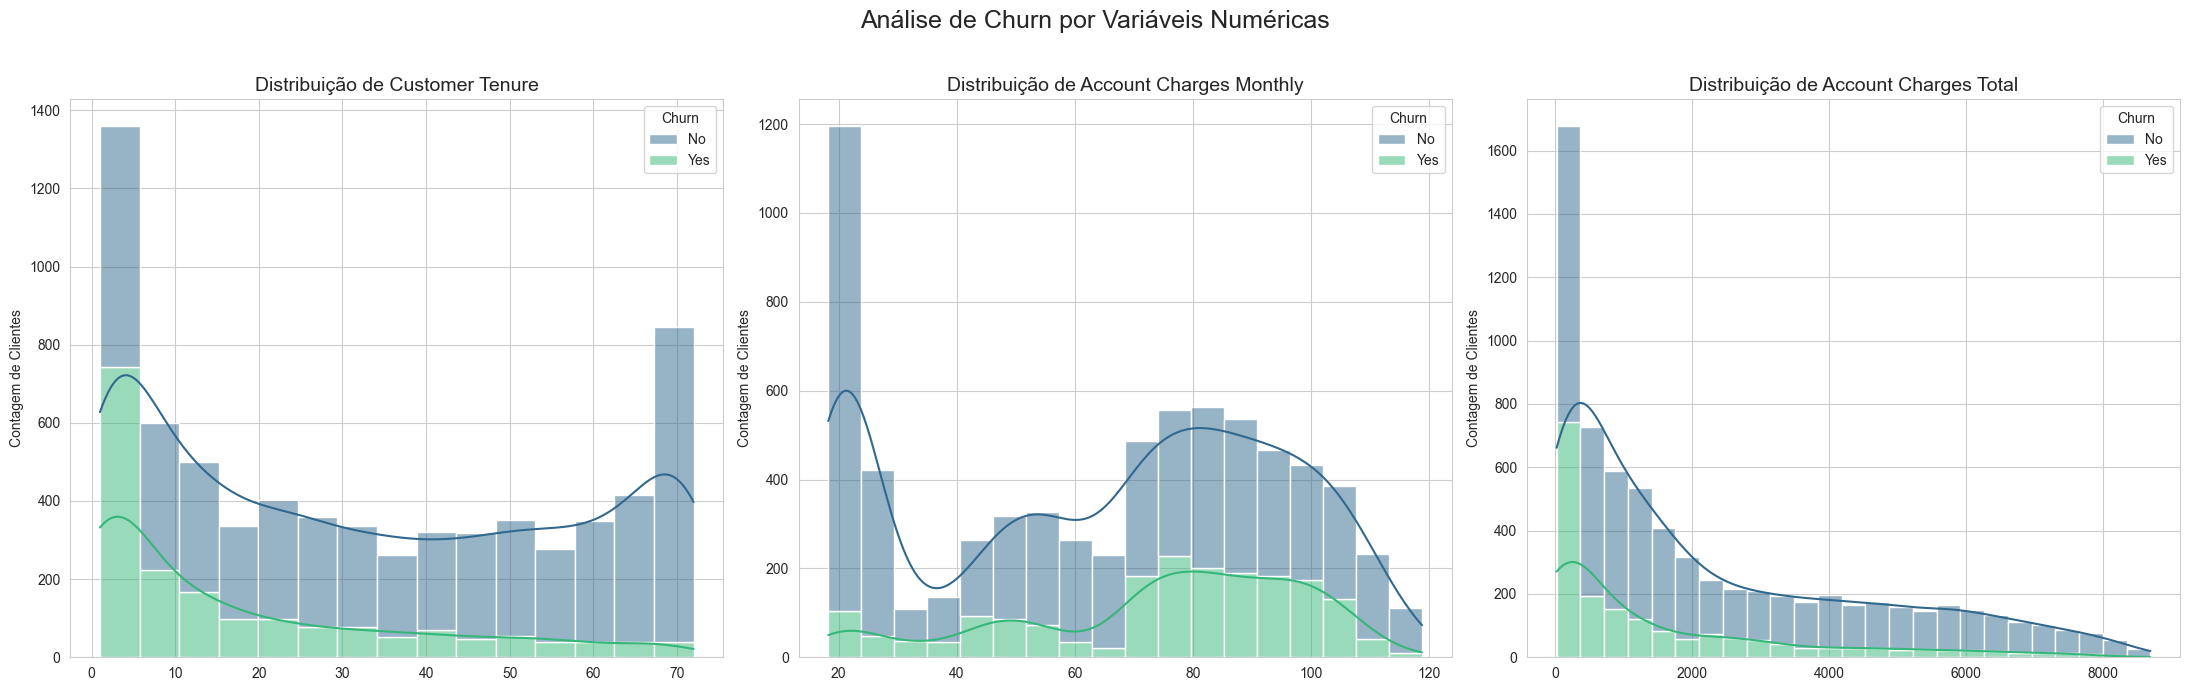

In [ ]:
#  colunas numéricas para análise
colunas_numericas = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Título geral da figura
fig.suptitle('Análise de Churn por Variáveis Numéricas', fontsize=18)


for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    sns.histplot(
        data=df_transformado,
        x=col,
        hue='Churn',
        kde=True,
        ax=ax,
        palette='viridis',
        multiple='stack'
    )
    ax.set_title(f'Distribuição de {col.replace("_", " ").title()}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Contagem de Clientes')

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## Relatório Final

### 📊 Relatório de Análise de Churn - Telecom X

#### 1. Introdução
Este relatório apresenta uma análise exploratória da base de clientes da **Telecom X**, com foco em identificar fatores que contribuem para a evasão de clientes (Churn).  
A empresa enfrenta aumento na taxa de cancelamentos, o que impacta receita e estabilidade. O objetivo é gerar insights baseados em dados para apoiar estratégias de retenção.

---

#### 2. Processo de ETL
- **Extração:** Dados obtidos via API em JSON, com +7.000 clientes.  
- **Transformação e Limpeza:**  
  - Conversão de tipos de dados (ex.: gastos totais).  
  - Remoção de inconsistências e valores ausentes no alvo (Churn).  
  - Resultado final: base estruturada com **7.032 clientes**.

---

#### 3. Análise Exploratória e Achados
- **Taxa de Churn:** 26,5% dos clientes cancelaram.  
- **Principais insights:**  
  - **Contrato:** Clientes com contrato *Mês a Mês* apresentam maior taxa de cancelamento.  
  - **Tempo de Serviço:** Cancelamentos ocorrem mais nos primeiros meses.  
  - **Gasto Mensal:** Valores mais altos estão associados a maior evasão.  
  - **Serviços Adicionais:** Ausência de *TechSupport* ou *OnlineSecurity* aumenta o risco.  
  - **Tipo de Internet:** Fibra Ótica tem maior taxa de Churn, sugerindo questões de preço ou qualidade.

---

#### 4. Conclusão e Recomendações
- **Perfil do cliente com maior risco:**  
  Pouco tempo de contrato, plano mensal, alta fatura e sem serviços adicionais.

- **Recomendações:**  
  - Criar programas de fidelização e descontos progressivos nos 6 primeiros meses.  
  - Incentivar migração de planos *Mês a Mês* para anuais.  
  - Investigar satisfação dos clientes de Fibra Ótica e oferecer pacotes com suporte e segurança inclusos.
